Feature: 0, Score: 0.05545
Feature: 1, Score: 0.07599
Feature: 2, Score: 0.09471
Feature: 3, Score: 0.12723
Feature: 4, Score: 0.11373
Feature: 5, Score: 0.13780
Feature: 6, Score: 0.04504
Feature: 7, Score: 0.24471
Feature: 8, Score: 0.10535


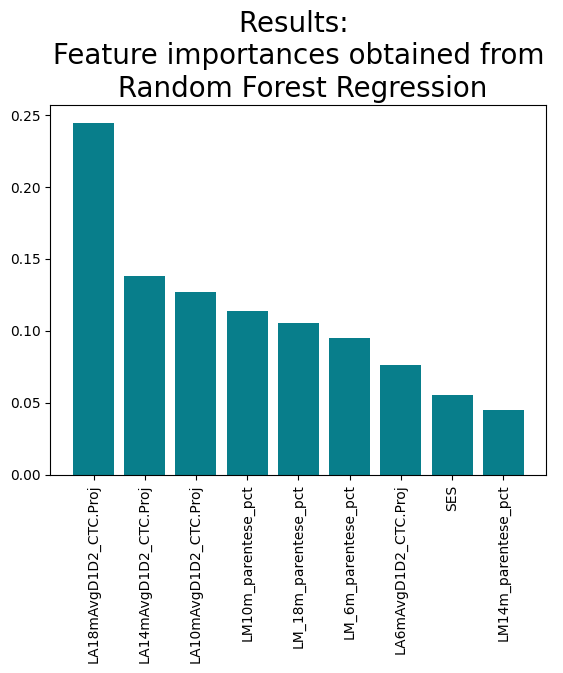

In [28]:
# TURN-TAKING VISUALIZATION

import sklearn
import pandas as pd
import matplotlib.pyplot as plt

# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define dataset
#%pip install openpyxl

FILE_turns = r'C:\Users\lvfeu\Desktop\PhD\University of Zurich\Paper 1\Kuhl dataset.xlsx'
turns_data= pd.read_excel(FILE_turns)
#print(turns_data)

# Split the data into features (X) and target (y)
turns_data=turns_data.dropna()
X = turns_data.drop(['Subject ID', 'Group', 'VOCAB_18mo_CDI', 'LM_6m_babbling_pct', 'LA6mAvgD1D2_AWC.Proj', 'LA6mAvgD1D2_CVC.Proj', 'LM_6m_standard_pct', 'LA10mAvgD1D2_AWC.Proj', 'LA10mAvgD1D2_CVC.Proj', 'LM10m_standard', 'LA14mAvgD1D2_AWC.Proj', 'LA14mAvgD1D2_CVC.Proj', 'LM14m_standard', 'LA18mAvgD1D2_AWC.Proj', 'LA18mAvgD1D2_CVC.Proj', 'LM_18m_standard_pct', 'LM_18m_baby_words'], axis=1)
y = turns_data['VOCAB_18mo_CDI']

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': importance
})
importances = importances.sort_values(by='Importance', ascending=False)

# plot
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Results: \n Feature importances obtained from \n Random Forest Regression', size=20)
plt.xticks(rotation='vertical')
plt.show()

# https://www.datacamp.com/tutorial/random-forests-classifier-python
# https://www.geeksforgeeks.org/random-forest-regression-in-python/
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html


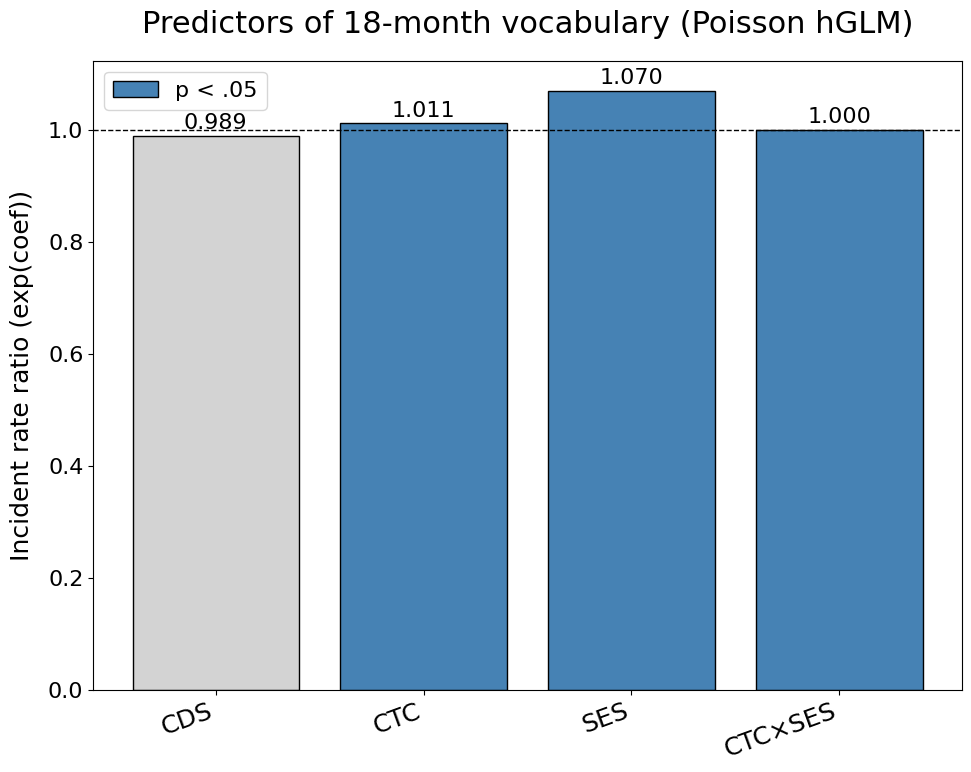

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# -------------------------------------------------------
# 1. Input: coefficients from R output
# -------------------------------------------------------
coefs = {
    "CDS":     {"coef": -1.065e-02, "p": 0.0736},
    "CTC":     {"coef":  1.142e-02, "p": 1.92e-12},
    "SES":     {"coef":  6.735e-02, "p": 9.90e-13},
    "CTC×SES": {"coef": -1.584e-04, "p": 2.45e-09},
}

df = pd.DataFrame(coefs).T
df["IRR"] = np.exp(df["coef"])  # incident rate ratios
df["sig"] = df["p"] < 0.05

# -------------------------------------------------------
# 2. Global style adjustments
# -------------------------------------------------------
plt.rcParams.update({
    "font.size": 16,         # default font size
    "axes.titlesize": 22,    # title size
    "axes.labelsize": 18,    # axis label size
    "xtick.labelsize": 16,   # x tick size
    "ytick.labelsize": 16,   # y tick size
    "legend.fontsize": 16,   # legend size
})

# -------------------------------------------------------
# 3. Plot
# -------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 8))
colors = ["lightgray" if not sig else "steelblue" for sig in df["sig"]]

bars = ax.bar(df.index, df["IRR"], color=colors, edgecolor="black", linewidth=1)

# reference line at 1
ax.axhline(1, color="black", linewidth=1, linestyle="--")

# text labels above bars
for i, (name, row) in enumerate(df.iterrows()):
    ax.text(i, row["IRR"] + 0.005, f"{row['IRR']:.3f}",
            ha="center", va="bottom", fontsize=16, fontweight="medium")

ax.set_ylabel("Incident rate ratio (exp(coef))", labelpad=10)
ax.set_title("Predictors of 18-month vocabulary (Poisson hGLM)", pad=20)
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index, rotation=20, ha="right", fontsize=18)

# legend
legend_elems = [
    Patch(facecolor="steelblue", edgecolor="black", label="p < .05"),
    
]
ax.legend(handles=legend_elems, loc="upper left", frameon=True)

# layout & show
plt.tight_layout()
plt.savefig(r"C:\Users\lvfeu\Desktop\Plot_coefficients.jpg", dpi=600, bbox_inches="tight")
plt.show()
plt.show()


### Study 2 Descriptive Statistics

In [1]:
import pandas as pd
import openpyxl

# Load the Excel file
file_path = r"C:\Users\lvfeu\Desktop\LENA_220416\Final.xlsx"  # Replace with your actual file path
sheet_name = "Aggreggate (3)"    # Adjust if your sheet name differs

# Read the Excel sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Forward fill missing values in 'Duration' column
df['Duration'] = df['Duration'].fillna(0)

# Convert Duration to numeric type (optional but safer for calculations)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Print the cleaned DataFrame
print("Cleaned Data:")
print(df)

# Example analyses
# 1. Total duration by speaker
duration_by_speaker = df.groupby('Speaker')['Duration'].sum()
print("\nTotal Duration by Speaker:")
print(duration_by_speaker)

# 2. Count of utterances by Classification
utterance_count = df['Classification'].value_counts()
print("\nUtterance Count by Classification:")
print(utterance_count)

# 3. Average duration by Category
avg_duration_category = df.groupby('Category')['Duration'].mean()
print("\nAverage Duration by Category:")
print(avg_duration_category)

# Optional: save cleaned version
# df.to_excel("cleaned_data.xlsx", index=False)


Cleaned Data:
      Duration Speaker Language Category            Turn Classification
0        2.380     pap       de      cds  non-contingent       question
1        0.000     pap       de      cds  non-contingent           play
2        1.388     pap       de      cds  non-contingent           play
3        1.330     pap       de      cds  non-contingent           play
4        0.520     oma       en      ads  non-contingent            ads
...        ...     ...      ...      ...             ...            ...
6449     3.258     oma       ru      cds  non-contingent           play
6450     0.000     oma       ru      cds      initiation       question
6451     2.217     tch      tch      tch      contingent       grunting
6452     1.366     oma       ru      cds      contingent       question
6453     0.000     oma       ru      cds      contingent    scaffolding

[6454 rows x 6 columns]

Total Duration by Speaker:
Speaker
frau           4.850
fre         1976.032
mam          125.32

In [7]:
# Filter DataFrame to include only 'cds' and 'ads' categories
cds_ads_df = df[df['Category'].isin(['cds', 'ads'])]

# Count the utterances by Category
cds_ads_counts = cds_ads_df['Category'].value_counts()

# Display result
print("Utterance counts for 'cds' vs 'ads':")
print(cds_ads_counts)

Utterance counts for 'cds' vs 'ads':
Category
cds    4836
ads     110
Name: count, dtype: int64


In [8]:
# Count all utterances by Category
category_counts = df['Category'].value_counts()

# Display result
print("Utterance counts by Category:")
print(category_counts)


Utterance counts by Category:
Category
cds    4836
tch    1454
ads     110
toy      54
Name: count, dtype: int64


In [2]:
# 7. Turn-type distribution within 'cds' Category
cds_df = df[df['Category'] == 'cds']
cds_turn_counts = cds_df['Turn'].value_counts()
print("\nTurn Distribution in 'cds' Category:")
print(cds_turn_counts)

# 8. Sorted list of utterance types for 'cds' with 'initiation' Turn
cds_initiation_df = cds_df[cds_df['Turn'] == 'initiation']
cds_initiation_classification_counts = cds_initiation_df['Classification'].value_counts().sort_values(ascending=False)
print("\nUtterances in 'cds' Category with 'initiation' Turn (Sorted):")
print(cds_initiation_classification_counts)


Turn Distribution in 'cds' Category:
Turn
non-contingent    2585
contingent        2000
initiation         251
Name: count, dtype: int64

Utterances in 'cds' Category with 'initiation' Turn (Sorted):
Classification
description            66
question               46
play                   27
exclamation            21
imperative             21
backchannel            16
scaffolding            15
praise                 15
iconic                 10
unintelligible          7
singing                 5
repair 3                1
syntactic expansion     1
Name: count, dtype: int64


In [10]:
# 9. Proportion of 'initiation' Turn between 'tch' and 'cds'
initiation_df = df[df['Turn'] == 'initiation']
initiation_counts_by_category = initiation_df['Category'].value_counts()

# Extract counts
tch_count = initiation_counts_by_category.get('tch', 0)
cds_count = initiation_counts_by_category.get('cds', 0)
total_initiation = tch_count + cds_count

# Calculate percentages
if total_initiation > 0:
    tch_percent = (tch_count / total_initiation) * 100
    cds_percent = (cds_count / total_initiation) * 100

    print(f"\nDialogue Initiation by Category (out of {total_initiation}):")
    print(f"tch: {tch_count} ({tch_percent:.1f}%)")
    print(f"cds: {cds_count} ({cds_percent:.1f}%)")
else:
    print("\nNo initiation data found for 'tch' or 'cds' categories.")


Dialogue Initiation by Category (out of 501):
tch: 250 (49.9%)
cds: 251 (50.1%)


In [11]:
# 10. Filter for 'cds' category
cds_df = df[df['Category'] == 'cds']

# Separate dialogue vs non-dialogue subsets
dialogue_df = cds_df[cds_df['Turn'].isin(['initiation', 'contingent'])]
non_dialogue_df = cds_df[cds_df['Turn'] == 'non-contingent']

# Count Classifications
dialogue_counts = dialogue_df['Classification'].value_counts().sort_values(ascending=False)
non_dialogue_counts = non_dialogue_df['Classification'].value_counts().sort_values(ascending=False)

print("\nUtterance Classifications in Dialogue (initiation + contingent):")
print(dialogue_counts)

print("\nUtterance Classifications Outside Dialogue (non-contingent):")
print(non_dialogue_counts)

# 11. Merge for comparison
comparison_df = pd.DataFrame({
    'Dialogue Count': dialogue_counts,
    'Non-Contingent Count': non_dialogue_counts
}).fillna(0).astype(int)

# Add percentage difference if desired
comparison_df['Difference'] = comparison_df['Dialogue Count'] - comparison_df['Non-Contingent Count']

# Identify classifications that are missing or nearly missing in non-dialogue
missing_or_low = comparison_df[comparison_df['Non-Contingent Count'] <= 2]

print("\nComparison of Classification Counts (Dialogue vs Non-Contingent):")
print(comparison_df)

print("\nClassifications Missing or Nearly Missing in Non-Contingent:")
print(missing_or_low)



Utterance Classifications in Dialogue (initiation + contingent):
Classification
description            454
question               409
backchannel            309
imperative             190
exclamation            156
scaffolding            143
play                   121
praise                  81
vocal imitation         63
semantic expansion      58
iconic                  58
prosodic imitation      57
iconic imitation        38
repair 3                31
syntactic expansion     30
singing                 22
unintelligible          19
repair 1                 7
repair 2                 2
reading                  2
imperative               1
Name: count, dtype: int64

Utterance Classifications Outside Dialogue (non-contingent):
Classification
description           761
question              493
exclamation           259
play                  251
scaffolding           239
imperative            209
praise                102
backchannel            83
iconic                 81
singing        

In [12]:
# Total utterances in each group
total_dialogue = dialogue_df.shape[0]
total_non_dialogue = non_dialogue_df.shape[0]

# Calculate percentage per Classification
dialogue_percent = (dialogue_df['Classification'].value_counts(normalize=True) * 100).round(2)
non_dialogue_percent = (non_dialogue_df['Classification'].value_counts(normalize=True) * 100).round(2)

# Combine into a single DataFrame
percent_comparison_df = pd.DataFrame({
    'Dialogue %': dialogue_percent,
    'Non-Contingent %': non_dialogue_percent
}).fillna(0)

# Calculate difference in percentage
percent_comparison_df['% Difference (Dialogue - Non)'] = (
    percent_comparison_df['Dialogue %'] - percent_comparison_df['Non-Contingent %']
).round(2)

# Display
print("\nPercentage Comparison of Classifications (Dialogue vs Non-Contingent):")
print(percent_comparison_df.sort_values(by='Dialogue %', ascending=False))

# Optional: Find classifications nearly absent in non-contingent
low_non_dialogue = percent_comparison_df[percent_comparison_df['Non-Contingent %'] < 1]
print("\nClassifications Nearly Missing in Non-Contingent (<1%):")
print(low_non_dialogue)



Percentage Comparison of Classifications (Dialogue vs Non-Contingent):
                     Dialogue %  Non-Contingent %  \
Classification                                      
description               20.17             29.44   
question                  18.17             19.07   
backchannel               13.73              3.21   
imperative                 8.44              8.09   
exclamation                6.93             10.02   
scaffolding                6.35              9.25   
play                       5.38              9.71   
praise                     3.60              3.95   
vocal imitation            2.80              0.00   
semantic expansion         2.58              0.15   
iconic                     2.58              3.13   
prosodic imitation         2.53              0.08   
iconic imitation           1.69              0.00   
repair 3                   1.38              0.04   
syntactic expansion        1.33              0.00   
singing                    

In [13]:
# Total number of utterances overall
total_utterances = cds_df.shape[0]

# Calculate absolute counts
dialogue_df['Classification'] = dialogue_df['Classification'].str.strip()
non_dialogue_df['Classification'] = non_dialogue_df['Classification'].str.strip()
dialogue_counts = dialogue_df['Classification'].value_counts()
non_dialogue_counts = non_dialogue_df['Classification'].value_counts()

# Convert to percentage of total utterances
dialogue_percent_of_total = (dialogue_counts / total_utterances * 100).round(2)
non_dialogue_percent_of_total = (non_dialogue_counts / total_utterances * 100).round(2)

# Combine into a DataFrame
percent_total_df = pd.DataFrame({
    'Dialogue % (of total)': dialogue_percent_of_total,
    'Non-Contingent % (of total)': non_dialogue_percent_of_total
}).fillna(0)

# Difference column
percent_total_df['% Difference (Dialogue - Non)'] = (
    percent_total_df['Dialogue % (of total)'] - percent_total_df['Non-Contingent % (of total)']
).round(2)

# Display
print("\nClassification percentages relative to total utterances:")
print(percent_total_df.sort_values(by='Dialogue % (of total)', ascending=False))



Classification percentages relative to total utterances:
                     Dialogue % (of total)  Non-Contingent % (of total)  \
Classification                                                            
description                           9.39                        15.74   
question                              8.46                        10.19   
backchannel                           6.39                         1.72   
imperative                            3.95                         4.32   
exclamation                           3.23                         5.36   
scaffolding                           2.96                         4.94   
play                                  2.50                         5.19   
praise                                1.67                         2.11   
vocal imitation                       1.30                         0.00   
iconic                                1.20                         1.67   
semantic expansion                    1.20

C:\Users\lvfeu\AppData\Local\Temp\ipykernel_26148\3593513169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dialogue_df['Classification'] = dialogue_df['Classification'].str.strip()
C:\Users\lvfeu\AppData\Local\Temp\ipykernel_26148\3593513169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_dialogue_df['Classification'] = non_dialogue_df['Classification'].str.strip()


In [14]:
# First, define dialogue vs non-contingent if not already done
df['Dialogue_Status'] = df['Turn'].apply(lambda x: 'Dialogue' if x in ['initiation', 'contingent'] else 'Non-Contingent')

# Group by Language and Dialogue_Status and count utterances
language_dialogue_counts = df.groupby(['Language', 'Dialogue_Status']).size().unstack(fill_value=0)

# Optional: add total per language
language_dialogue_counts['Total'] = language_dialogue_counts.sum(axis=1)

# Display the result
print("\nUtterance Counts by Language (Inside vs Outside Dialogue):")
print(language_dialogue_counts)



Utterance Counts by Language (Inside vs Outside Dialogue):
Dialogue_Status  Dialogue  Non-Contingent  Total
Language                                        
de                     52              77    129
en                      1              33     34
fr                    334             741   1075
ru                   1861            1844   3705
tch                   944             509   1453
uk                      3              55     58


In [15]:
# Total number of utterances
total_utterances = len(df)

# Number of utterances by 'tch'
tch_utterances = df[df['Speaker'] == 'tch'].shape[0]

# Calculate percentage
tch_percentage = (tch_utterances / total_utterances) * 100

# Print results
print(f"Total utterances: {total_utterances}")
print(f"Utterances by 'tch': {tch_utterances} ({tch_percentage:.2f}%)")

Total utterances: 6454
Utterances by 'tch': 1454 (22.53%)


In [16]:
# Ensure Dialogue_Status column is defined
df['Dialogue_Status'] = df['Turn'].apply(lambda x: 'Dialogue' if x in ['initiation', 'contingent'] else 'Non-Contingent')

# Add a column to classify speaker group: 'tch' vs 'non-tch'
df['Speaker_Group'] = df['Speaker'].apply(lambda x: 'tch' if x == 'tch' else 'non-tch')

# Group by Speaker_Group and Dialogue_Status
speaker_dialogue_counts = df.groupby(['Speaker_Group', 'Dialogue_Status']).size().unstack(fill_value=0)

# Optional: Add totals
speaker_dialogue_counts['Total'] = speaker_dialogue_counts.sum(axis=1)

# Display results
print("\nUtterance Counts by Speaker (tch vs non-tch) and Dialogue Status:")
print(speaker_dialogue_counts)



Utterance Counts by Speaker (tch vs non-tch) and Dialogue Status:
Dialogue_Status  Dialogue  Non-Contingent  Total
Speaker_Group                                   
non-tch              2251            2749   5000
tch                   944             510   1454


In [17]:
import pandas as pd

# Example: df['Turn'] = ['initiation', 'contingent', 'contingent', 'non-contingent', 'initiation', 'contingent', ...]

# Step 1: Initialize variables
dialogical_units = []  # stores list of dialogical unit lengths
current_unit = 0
inside_unit = False

# Step 2: Iterate through the Turn column
for turn in df['Turn']:
    if turn == 'initiation':
        if inside_unit:
            dialogical_units.append(current_unit)
        current_unit = 1
        inside_unit = True
    elif inside_unit and turn == 'contingent':
        current_unit += 1
    elif inside_unit and turn == 'non-contingent':
        dialogical_units.append(current_unit)
        current_unit = 0
        inside_unit = False
    else:
        continue  # Skip other cases if needed

# Handle final dialogical unit (if it ends the file without closing)
if inside_unit and current_unit > 0:
    dialogical_units.append(current_unit)

# Step 3: Calculate average
if dialogical_units:
    average_turns = sum(dialogical_units) / len(dialogical_units)
    print(f"Average number of turns per dialogical unit: {average_turns:.2f}")
else:
    print("No dialogical units found.")


Average number of turns per dialogical unit: 6.38


In [ ]:
# Fisher's Exact Test

import pandas as pd
from scipy.stats import fisher_exact

# Make a copy to avoid modifying the original
df = cds_df.copy()
df['Classification'] = df['Classification'].str.strip()
# Merge utterance types into broader categories
df['Classification'] = df['Classification'].replace({
    'vocal imitation': 'imitation',
    'iconic imitation': 'imitation',
    'prosodic imitation': 'imitation',
    'semantic expansion': 'expansion',
    'syntactic expansion': 'expansion',
    'repair 1': 'repair',
    'repair 2': 'repair',
    'repair 3': 'repair'
})

# Create binary column for turn-taking
df['is_in_turn'] = df['Turn'].isin(['contingent', 'initiation'])

results = []

# Loop through each (merged) classification type
for classification in df['Classification'].dropna().unique():
    # Boolean masks
    is_class = df['Classification'] == classification
    is_other = ~is_class

    # Build 2×2 contingency table
    a = ((is_class) & (df['is_in_turn'])).sum()
    b = ((is_class) & (~df['is_in_turn'])).sum()
    c = ((is_other) & (df['is_in_turn'])).sum()
    d = ((is_other) & (~df['is_in_turn'])).sum()

    table = [[a, b],
             [c, d]]

    try:
        oddsratio, p = fisher_exact(table)
    except:
        oddsratio, p = None, None

    results.append({
        'utterance_type': classification,
        'in_turn': a,
        'non_contingent': b,
        'odds_ratio': oddsratio,
        'p_value': p
    })

# Create DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('p_value')

# Show significant ones
significant = results_df[results_df['p_value'] < 0.05]
print(significant)

   utterance_type  in_turn  non_contingent  odds_ratio       p_value
5       imitation      158               2   97.494983  6.243943e-51
4     backchannel      309              83    4.796434  2.854373e-42
11      expansion       88               4   26.251503  6.433153e-25
3     description      454             761    0.605547  1.110624e-13
2          repair       40               1   46.748078  9.722155e-13
1            play      121             251    0.528242  1.516072e-08
6         singing       22              70    0.354611  7.282054e-06
8     exclamation      156             259    0.668730  1.355881e-04
7     scaffolding      143             239    0.665879  2.190013e-04


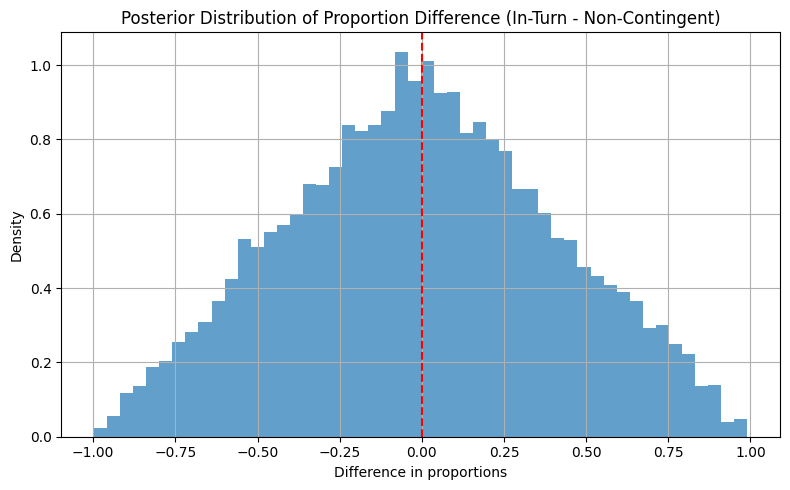

Mean difference: -0.001
95% credible interval: [-0.77665887  0.7833027 ]
Probability In-Turn > Non-Contingent: 0.497


In [6]:
# Bayesian Comparison of Two Proportions

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

df = cds_df.copy()
df['Classification'] = df['Classification'].str.strip()
# Merge utterance types into broader categories
df['Classification'] = df['Classification'].replace({
    'vocal imitation': 'imitation',
    'iconic imitation': 'imitation',
    'prosodic imitation': 'imitation',
    'semantic expansion': 'expansion',
    'syntactic expansion': 'expansion',
    'repair 1': 'repair',
    'repair 2': 'repair',
    'repair 3': 'repair'
})

# Create binary column for turn-taking
df['is_in_turn'] = df['Turn'].isin(['contingent', 'initiation'])

# Define the classification of interest
target_class = 'Imperative'  # ← change this to whatever category you're analyzing

# Filter for each group
in_turn = df[df['is_in_turn'] == 'True']
non_contingent = df[df['is_in_turn'] == 'False']

# Count how many imperatives in each group (successes)
k1 = (in_turn['Classification'] == target_class).sum()
k2 = (non_contingent['Classification'] == target_class).sum()

# Total utterances in each group (sample size)
n1 = len(in_turn)
n2 = len(non_contingent)

# Posterior distributions assuming uniform Beta(1,1) priors
posterior1 = beta(a=1 + k1, b=1 + n1 - k1)
posterior2 = beta(a=1 + k2, b=1 + n2 - k2)

# Sample from posteriors
samples1 = posterior1.rvs(10000)
samples2 = posterior2.rvs(10000)
diff_samples = samples1 - samples2

# Summary statistics
mean_diff = np.mean(diff_samples)
cred_interval = np.percentile(diff_samples, [2.5, 97.5])
prob_diff_gt_0 = np.mean(diff_samples > 0)

# Plot
plt.figure(figsize=(8, 5))
plt.hist(diff_samples, bins=50, density=True, alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Posterior Distribution of Proportion Difference (In-Turn - Non-Contingent)")
plt.xlabel("Difference in proportions")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Mean difference: {mean_diff:.3f}")
print(f"95% credible interval: {cred_interval}")
print(f"Probability In-Turn > Non-Contingent: {prob_diff_gt_0:.3f}")


In [8]:
# The script to go through all the Classifications:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import pandas as pd

# Copy and preprocess the dataframe
df = cds_df.copy()
df['Classification'] = df['Classification'].str.strip()

# Merge similar classification categories
df['Classification'] = df['Classification'].replace({
    'vocal imitation': 'imitation',
    'iconic imitation': 'imitation',
    'prosodic imitation': 'imitation',
    'semantic expansion': 'expansion',
    'syntactic expansion': 'expansion',
    'repair 1': 'repair',
    'repair 2': 'repair',
    'repair 3': 'repair'
})

# Create a binary column for turn-taking (True if contingent or initiation)
df['is_in_turn'] = df['Turn'].isin(['contingent', 'initiation'])

# Ensure boolean values, not strings
df['is_in_turn'] = df['is_in_turn'].astype(bool)

# Get unique classification categories
classifications = df['Classification'].dropna().unique()

# Prepare results storage
results = []

# Loop through each classification
for target_class in classifications:
    # Filter for in-turn and non-contingent groups
    in_turn = df[df['is_in_turn']]
    non_contingent = df[~df['is_in_turn']]

    # Count successes (utterances with target classification)
    k1 = (in_turn['Classification'] == target_class).sum()
    k2 = (non_contingent['Classification'] == target_class).sum()

    # Count totals
    n1 = len(in_turn)
    n2 = len(non_contingent)

    # Posterior distributions
    posterior1 = beta(a=1 + k1, b=1 + n1 - k1)
    posterior2 = beta(a=1 + k2, b=1 + n2 - k2)

    # Sample from posteriors
    samples1 = posterior1.rvs(10000)
    samples2 = posterior2.rvs(10000)
    diff_samples = samples1 - samples2

    # Summary statistics
    mean_diff = np.mean(diff_samples)
    cred_interval = np.percentile(diff_samples, [2.5, 97.5])
    prob_diff_gt_0 = np.mean(diff_samples > 0)

    # Append results
    results.append({
        'Classification': target_class,
        'Mean Difference': round(mean_diff, 3),
        '95% CI Lower': round(cred_interval[0], 3),
        '95% CI Upper': round(cred_interval[1], 3),
        'P(In-Turn > Non-Contingent)': round(prob_diff_gt_0, 3),
        'In-Turn Count': k1,
        'Non-Contingent Count': k2
    })

# Create a DataFrame with the results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='P(In-Turn > Non-Contingent)', ascending=False)

# Display results
print(results_df.to_string(index=False))

# Optional: Save to CSV
# results_df.to_csv('bayesian_turn_comparison.csv', index=False)


Classification  Mean Difference  95% CI Lower  95% CI Upper  P(In-Turn > Non-Contingent)  In-Turn Count  Non-Contingent Count
        repair            0.018         0.012         0.023                        1.000             40                     1
   backchannel            0.105         0.090         0.121                        1.000            309                    83
     imitation            0.069         0.059         0.080                        1.000            158                     2
     expansion            0.038         0.030         0.046                        1.000             88                     4
    imperative            0.004        -0.012         0.019                        0.698            191                   209
unintelligible           -0.001        -0.006         0.005                        0.387             19                    24
        praise           -0.003        -0.014         0.007                        0.268             81               

### CHARTS


In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

from matplotlib.font_manager import FontProperties
personal_path = 'C:/Users/lvfeu/Desktop/PhD/University of Zurich/Paper 2/Metaphor Identification Corpus 3 modalities/'

# get normal font and store it in `Helvetica`
font_path = personal_path + 'helveticaneue.ttf'
Helvetica = FontProperties(fname=font_path)

# -----------------------------
# Data Setup
# -----------------------------
ages = ['6 m.o.', '12 m.o. (1)', '12 m.o. (2)', '18 m.o.']
x_positions = [6, 12, 12, 18]
y_positions = [300, 440, 160, 300]  # Stack 12 mo pies vertically
total_dialogues = np.array([125, 515, 501, 336])
child_pct = np.array([0.24, 0.53, 0.499, 0.634])
caregiver_pct = 1 - child_pct
colors = ['#377eb8', '#ff7f00']  # Blue for child, orange for caregiver

# -----------------------------
# Pie Size Scaling
# -----------------------------
max_radius = 2  # control how big the biggest pie is
scaled_radii = np.sqrt(total_dialogues / total_dialogues.max()) * max_radius
pie_diameters = scaled_radii * 2  # convert radius to diameter

# -----------------------------
# Plot Setup
# -----------------------------
fig, ax = plt.subplots(figsize=(15, 10), dpi=600)
ax.set_xlim(5, 20)
ax.set_ylim(0, 600)

ax.set_xlabel("Child's Age (months)", fontsize=24, font=Helvetica, labelpad=15)
ax.set_ylabel('Turn initiation percentage in all dialogues', fontsize=26, font=Helvetica, labelpad=15)
ax.set_title('Dialogue Initiation Across Ages', font=Helvetica, fontsize=30, pad=20)

ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for label in ax.get_xticklabels():
    label.set_fontproperties(Helvetica)
ax.tick_params(axis='x', labelsize=20)

# -----------------------------
# Draw Pies + % Labels
# -----------------------------
for i in range(len(ages)):
    center_x, center_y = x_positions[i], y_positions[i]
    diameter = pie_diameters[i]

    # Pie container
    inset_ax = inset_axes(ax,
                          width=diameter,
                          height=diameter,
                          loc='center',
                          bbox_to_anchor=(center_x, center_y),
                          bbox_transform=ax.transData,
                          borderpad=0)

    # Draw pie
    wedges, _ = inset_ax.pie(
        [child_pct[i], caregiver_pct[i]],
        colors=colors,
        startangle=90,
        wedgeprops=dict(edgecolor='white')
    )
    inset_ax.set_aspect('equal')
    inset_ax.axis('off')

    # Add child % label inside the blue wedge
    inset_ax.text(-0.4, 0.17, f"{round(child_pct[i]*100)}%",
                  color='white', fontsize=25, weight='bold',
                  ha='center', va='center', font=Helvetica)

    # Add age label below each pie
    ax.text(center_x, center_y - diameter * 37, ages[i], ha='center', fontsize=23, font=Helvetica)

# -----------------------------
# Legend
# -----------------------------
legend_labels = ['Child-initiated', 'Caregiver-initiated']
legend_patches = [plt.Line2D([0], [0], marker='o', color='w',
                              markerfacecolor=c, markersize=16)
                  for c in colors]

ax.legend(legend_patches, legend_labels,
          loc='upper right', fontsize=26, frameon=False)

plt.tight_layout()
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

plt.savefig(r"C:\Users\lvfeu\Desktop\Initiation_Dialogues.jpg", dpi=600, bbox_inches="tight")
plt.show()



C:\Users\lvfeu\AppData\Local\Temp\ipykernel_26148\378426901.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -----------------------------
# Data Setup (example from image)
# -----------------------------
data = {
    'Classification': [
        'Description', 'Question', 'Backchannel', 'Imperative', 'Exclamation',
        'Imitation', 'Scaffolding', 'Play', 'Expansion', 'Praise',
        'Iconic', 'Repair', 'Singing'
    ],
    'Within_Dialogue': [9.39, 8.46, 6.39, 3.95, 3.23, 3.27, 2.96, 2.50, 1.82, 1.67, 1.20, 1, 0.45],
    'Outside_Dialogue': [15.74, 10.19, 1.72, 4.32, 5.36, 0.04, 4.94, 5.19, 0.08, 2.11, 1.67, 0.02, 1.45]
}

df = pd.DataFrame(data)
df.sort_values('Outside_Dialogue', ascending=True, inplace=True)
y_pos = np.arange(len(df))

# -----------------------------
# Plot Setup
# -----------------------------
fig, ax = plt.subplots(figsize=(15, 10), dpi=600)

# Draw lines between the two sides
for i in range(len(df)):
    ax.plot(
        [-1 * df['Outside_Dialogue'].iloc[i], 1 * df['Within_Dialogue'].iloc[i]],
        [y_pos[i], y_pos[i]],
        color='gray', lw=2, zorder=1
    )

# Scatter plots (dots)
ax.scatter(-1 * df['Outside_Dialogue'], y_pos, color='#ff7f00', s=200, label='Outside Dialogue', zorder=2)
ax.scatter(1 * df['Within_Dialogue'], y_pos, color='#377eb8', s=200, label='Within Dialogue', zorder=2)

# -----------------------------
# Bold selective labels
# -----------------------------
highlight = {'Imitation', 'Expansion', 'Repair'}
formatted_labels = [
    f"$\\bf{{{label}}}$" if label in highlight else label
    for label in df['Classification']
]
ax.set_yticks(y_pos)
ax.set_yticklabels(formatted_labels, font=Helvetica, fontsize=24)

# -----------------------------
# Axis settings
# -----------------------------
ax.set_xlabel('Proportion (%)', font=Helvetica, fontsize=24)
ax.set_title('Within vs Outside Dialogue: CDS Utterance Classification', font=Helvetica, fontsize=30, pad=15)

ax.axvline(0, color='black', lw=1)
ax.set_xlim(-20, 20)
ax.set_xticks(np.arange(-20, 21, 5))
ax.set_xticklabels([f"{abs(t)}%" for t in np.arange(-20, 21, 5)], font=Helvetica, fontsize=18)

# -----------------------------
# Legend styling
# -----------------------------
legend = ax.legend(loc='lower left')
# Optional: apply custom font
for text in legend.get_texts():
    text.set_fontproperties(Helvetica)
    text.set_fontsize(26)

plt.grid(True, axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
#plt.margins(0.2)

plt.savefig(r"C:\Users\lvfeu\Desktop\Within_Outside_Dialogues.jpg", dpi=600)
plt.show()


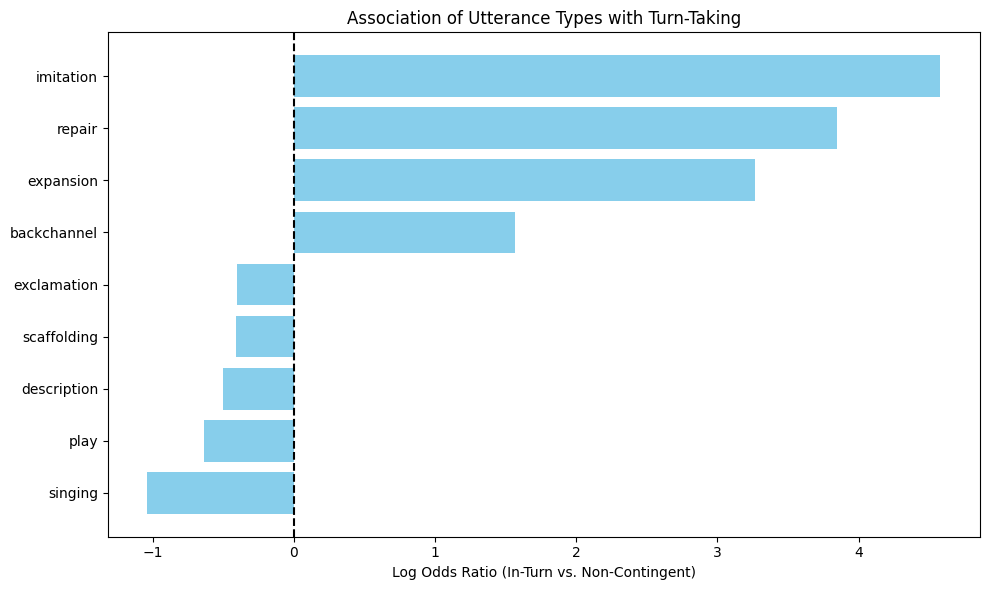

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Filter top results and compute log(odds_ratio)
plot_df = results_df[results_df['p_value'] < 0.05].copy()
plot_df['log_odds'] = np.log(plot_df['odds_ratio'].replace(0, np.nan))
plot_df = plot_df.replace([np.inf, -np.inf], np.nan).dropna()

# Sort by log-odds
plot_df = plot_df.sort_values('log_odds')

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(plot_df['utterance_type'], plot_df['log_odds'], color='skyblue')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Log Odds Ratio (In-Turn vs. Non-Contingent)')
plt.title('Association of Utterance Types with Turn-Taking')
plt.tight_layout()
plt.show()


### Reliabilities


Cohen's Kappa: 0.84


<Figure size 1200x1000 with 0 Axes>

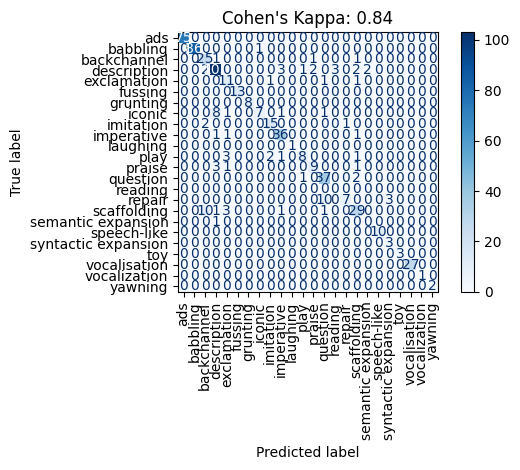

In [ ]:
# Training
import pandas as pd
from sklearn.metrics import cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Step 1: Load the Excel file ===
file_path = r'C:\Users\lvfeu\Desktop\LENA_220416\Reliabilities_Test_OlgaS.xlsx'
df = pd.read_excel(file_path)

# === Step 2: Select and clean relevant columns ===
annotations = df[['Classification 1', 'Classification 2']].dropna()
annotations = annotations.apply(lambda col: col.str.strip().str.lower())  # Normalize labels

# === Step 3: Compute Cohen's Kappa ===
kappa = cohen_kappa_score(
    annotations['Classification 1'],
    annotations['Classification 2']
)
print(f"Cohen's Kappa: {kappa:.2f}")

# === Step 4: Generate and plot confusion matrix ===
labels = sorted(set(annotations['Classification 1']).union(set(annotations['Classification 2'])))
cm = confusion_matrix(
    annotations['Classification 1'],
    annotations['Classification 2'],
    labels=labels
)

# Optional: Display confusion matrix using matplotlib
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90, cmap="Blues")
plt.title(f"Cohen's Kappa: {kappa:.2f}")
plt.tight_layout()
plt.show()


In [ ]:
# Final Test
import pandas as pd
from sklearn.metrics import cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Step 1: Load the Excel file ===
file_path = r'C:\Users\lvfeu\Desktop\LENA_220416\Reliabilities_Test_OlgaS.xlsx'
df = pd.read_excel(file_path, sheet_name="Test")

# === Step 2: Select and clean relevant columns ===
annotations = df[['Classification 1', 'Classification 2']].dropna()
annotations = annotations.apply(lambda col: col.str.strip().str.lower())  # Normalize labels

# === Step 3: Compute Cohen's Kappa ===
kappa = cohen_kappa_score(
    annotations['Classification 1'],
    annotations['Classification 2']
)
print(f"Cohen's Kappa: {kappa:.2f}")


Cohen's Kappa: 0.83


In [ ]:
import matplotlib.pyplot as plt

# 1. Put your real model coefficients here
# e.g. from statsmodels, bambi, pymer, or R export
coef_names = [
    "CDS_percent",
    "CTC_turns",      # this is the one you want to stand out
    "SES_score",
    "SES × CTC",
]

# example numbers – replace with your real estimates
coef_values = [0.06, 0.28, 0.03, 0.08]

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(coef_names, coef_values)
ax.set_xlabel("Predictors")
ax.set_ylabel("Poisson GLM coefficient")
ax.set_title("Predictors of vocabulary: turns (CTC) vs. other inputs")

# tilt labels a bit so long names fit
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()
